<a href="https://colab.research.google.com/github/SushilKokare/AtiNeu_Project/blob/main/scratch_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as k
from keras.models import Model
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,Dropout,Flatten
import keras
from keras.optimizers import SGD
from keras.activations import relu

In [5]:
from keras.models import Sequential

In [6]:
# pathTrain = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'

pathTrain  = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised_Extended/Train'

pathTest ='/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'

In [7]:
train_gen = ImageDataGenerator(rescale = 1./255,    
                               rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
test_gen = ImageDataGenerator( rescale = 1./255)

In [10]:
# img_size = (650, 650)
img_size = (225,225)
batch_size = 32
num_channels = 1

In [11]:
train_data = train_gen.flow_from_directory(
    pathTrain,
    target_size = img_size,
    color_mode = 'grayscale',
    # target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True,
    # classes = ['Normal','Stroke']
)

Found 11856 images belonging to 2 classes.


In [12]:
train_data.image_shape

(225, 225, 1)

In [13]:
test_data =test_gen.flow_from_directory(
    pathTest,
    target_size = img_size,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    # classes = ['Normal','Stroke'],
    batch_size = batch_size
)

Found 250 images belonging to 2 classes.


In [14]:
test_data.image_shape

(225, 225, 1)

In [15]:
import tensorflow as tf

In [30]:
def main_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(225,225,1 )))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  # model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  # model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  # model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dropout(0.2))
  model.add(Dense(2, activation='sigmoid'))
  
  return model

In [22]:
# def model_2():
#   model = Sequential()
#   model.add(Conv2D(32,(3,3), activation='relu'))
#   # model.add(relu())
#   model.add(Conv2D(64,(3,3), activation='relu'))
#   # model.add(relu())
#   model.add(MaxPooling2D(2,2))
#   # model.add(relu())
#   model.add(Conv2D(32,(3,3), activation='relu'))
#   # model.add(relu())
#   model.add(MaxPooling2D(2,2), activation='relu')
#   model.add(Flatten())
#   model.add(Dense(128), activation='relu')
#   # model.add(relu())
#   model.add(Dense(2,activation='sigmoid'))
#   # compile model
#   opt = SGD(lr=0.001, momentum=0.9)
#   model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#   return model
  


In [23]:

# model = Sequential()
# model.add(Conv2D(32,(3,3), activation='relu' , input_shape=(225,225,1)))
# # model.add(relu())
# model.add(Conv2D(64,(3,3), activation='relu'))
# # model.add(relu())
# model.add(MaxPooling2D(2,2))
# # model.add(relu())
# model.add(Conv2D(32,(3,3), activation='relu'))
# # model.add(relu())
# model.add(MaxPooling2D(2,2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# # model.add(relu())
# model.add(Dense(2,activation='sigmoid'))
# # compile model
# opt = SGD(lr=0.001, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
model = main_model() 

In [32]:
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
history = model.fit(train_data, epochs=5, batch_size = 32, validation_data=test_data)

Epoch 1/5
371/371 [==============================] - 4160s 11s/step - loss: 0.6764 - accuracy: 0.5983 - val_loss: 0.7331 - val_accuracy: 0.5000
Epoch 2/5
371/371 [==============================] - 130s 351ms/step - loss: 0.6709 - accuracy: 0.6006 - val_loss: 0.7695 - val_accuracy: 0.5000
Epoch 3/5
371/371 [==============================] - 130s 349ms/step - loss: 0.6699 - accuracy: 0.6007 - val_loss: 0.7297 - val_accuracy: 0.5000
Epoch 4/5
371/371 [==============================] - 130s 349ms/step - loss: 0.6696 - accuracy: 0.6006 - val_loss: 0.7284 - val_accuracy: 0.5000
Epoch 5/5
371/371 [==============================] - 130s 349ms/step - loss: 0.6692 - accuracy: 0.6007 - val_loss: 0.7636 - val_accuracy: 0.5000


In [ ]:
#  # test_loss, test_acc = model.evaluate(test_data)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_acc)

In [34]:
from keras import layers

In [35]:

model1 = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [36]:

history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=5)


Epoch 1/5
371/371 [==============================] - 135s 355ms/step - loss: 0.6846 - accuracy: 0.6002 - val_loss: 0.7183 - val_accuracy: 0.5000
Epoch 2/5
277/371 [=====================>........] - ETA: 32s - loss: 0.6661 - accuracy: 0.6021

KeyboardInterrupt: ignored

In [43]:

def create_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        # layers.Dropout(0.25),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        # layers.Dropout(0.25),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        # layers.Dropout(0.25),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        # layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model



In [44]:
model = create_model((225, 225, 1), 2)


In [48]:
from keras.optimizers import Adam

In [49]:
opt = Adam(learning_rate=0.0001)

In [50]:
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [51]:
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=5)


Epoch 1/5
371/371 [==============================] - 138s 369ms/step - loss: 0.6187 - accuracy: 0.6603 - val_loss: 1.0693 - val_accuracy: 0.5200
Epoch 2/5
371/371 [==============================] - 134s 362ms/step - loss: 0.5863 - accuracy: 0.6808 - val_loss: 1.4224 - val_accuracy: 0.5160
Epoch 3/5
371/371 [==============================] - 134s 362ms/step - loss: 0.5678 - accuracy: 0.6991 - val_loss: 0.6145 - val_accuracy: 0.6640
Epoch 4/5
371/371 [==============================] - 135s 362ms/step - loss: 0.5549 - accuracy: 0.7080 - val_loss: 0.6371 - val_accuracy: 0.6080
Epoch 5/5
371/371 [==============================] - 134s 360ms/step - loss: 0.5438 - accuracy: 0.7128 - val_loss: 0.6634 - val_accuracy: 0.7040


In [52]:
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=30)


Epoch 1/30
371/371 [==============================] - 134s 362ms/step - loss: 0.5346 - accuracy: 0.7214 - val_loss: 1.9780 - val_accuracy: 0.5000
Epoch 2/30
371/371 [==============================] - 135s 363ms/step - loss: 0.5217 - accuracy: 0.7310 - val_loss: 0.6266 - val_accuracy: 0.6360
Epoch 3/30
371/371 [==============================] - 135s 363ms/step - loss: 0.5149 - accuracy: 0.7377 - val_loss: 0.5598 - val_accuracy: 0.6680
Epoch 4/30
371/371 [==============================] - 135s 364ms/step - loss: 0.5089 - accuracy: 0.7427 - val_loss: 2.3112 - val_accuracy: 0.5000
Epoch 5/30
371/371 [==============================] - 136s 368ms/step - loss: 0.4978 - accuracy: 0.7488 - val_loss: 0.5860 - val_accuracy: 0.6880
Epoch 6/30
371/371 [==============================] - 137s 368ms/step - loss: 0.4956 - accuracy: 0.7536 - val_loss: 0.6274 - val_accuracy: 0.6760
Epoch 7/30
371/371 [==============================] - 135s 364ms/step - loss: 0.4853 - accuracy: 0.7570 - val_loss: 2.1210 -

In [54]:
import matplotlib.pyplot as plt

In [57]:
import pandas as pd

In [59]:
pd.DataFrame(history.history).head(2)

,loss,accuracy,val_loss,val_accuracy
0,0.534639,0.721407,1.978007,0.500
1,0.521662,0.731022,0.626561,0.636


In [62]:
# lom = ['accuracy','val_accuracy']
# plt.figure()
# for i in lom:
#   x = history.history[i]
#   plt.plot(x)
#   plt.legend()

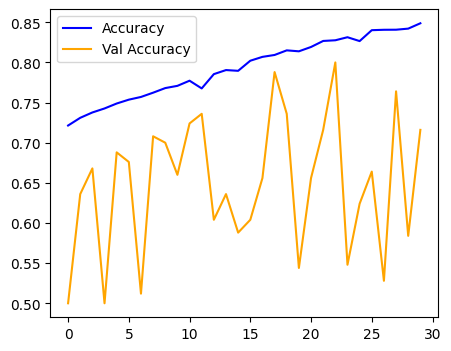

In [68]:
plt.figure(figsize=(5,4))
plt.plot(history.history['accuracy'],color='blue',label='Accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='Val Accuracy')
plt.legend()
plt.show()